In [2]:
library(qiime2R)
library(tidyr)
library(tibble)
library(ggplot2)
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")
library(ggpmisc)

Loading required package: phyloseq


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2020 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


── Attaching packages ────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ readr   2.1.2     ✔ stringr 1.4.0
✔ purrr   0.3.4     ✔ forcats 0.5.1
✔ dplyr   1.0.9     

── Conflicts ───────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ microbiome::alpha() masks ggplot2::alpha()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()

Loading required package: ggpp


Attaching package: ‘ggpp’


The following object is masked from ‘package:ggplot2’:

    annotate


Warning message in .recacheSubclasses(def@className, def, env):
“undefined subclass "numeri

In [3]:
# Read in the 16S qza files and clean them up for phyloseq
ASVs <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/table-BacArc_resistada.qza")
ASVs <- ASVs$data # Extract the count data from list
taxa_16S <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/taxonomy_resistada.qza")
taxa_16S <- taxa_16S$data %>% as_tibble() %>% separate(Taxon, sep=";",
c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) %>% 
# Convert taxonomy info to data frame with correct taxonomy labels
#taxa <- taxa_16S[-1,]
select(-Confidence) %>% arrange(Feature.ID) %>% mutate(ASV = 1:n()) %>% 
mutate(newcol = "ASV") %>%
unite("ASVs", newcol:ASV) %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "o__",
                replacement = "")
#asv_tab$asv_id <- rownames(asv_tab) # add a new column for ids
tree_file <-read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/rooted-BacArc_resistada.qza")$data



Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 5374 rows [3, 6, 9, 11, 12, 14, 15, 16, 17, 18, 22, 23, 27, 31, 36, 38, 42, 45, 49, 51, ...].”


In [4]:
meta = read.csv("/Users/stephanie.rosales/Documents/omics_projects/Resitada/metadata_RESISTADA.csv", 
                header = T, row.names = 1,
na.strings = c("", "NA"))

In [5]:
ps= phyloseq(otu_table(ASVs, taxa_are_rows= T),
tax_table(as.data.frame(taxa_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(meta), tree_file)
ps

dups = c("N169_256_R2", "N157_265_R2", "N165_296_R2", "N161_A067_R2", "N185_A088_R2",
                                 "N164_A089_R2","N119_A107","N267_A110","N7_A114", "N156_A115","N158_A116",
                                 "N101_A118","N160_A119","N277_A125")

ps = subset_samples(ps, !ID %in% dups & Genotype!=c("U41"))
                                                    #,"U44")) 
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 280 samples ]
sample_data() Sample Data:       [ 280 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

In [6]:
ps_razor =subset_samples(ps, Type=="Razor")
ps_razor

ps_razor_nr =subset_taxa(ps_razor, Genus!="g__MD3-55" )
ps_razor_nr

ps_Clipped =subset_samples(ps, Type=="Clipped")
ps_Clipped

ps_clip_nr =subset_taxa(ps_Clipped, Genus!="g__MD3-55" )
ps_clip_nr

ps_neg =subset_samples(ps, Type=="Neg")
ps_neg

ps_paired = subset_samples(ps_Clipped, Pairs=="paired")
ps_paired

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 60 samples ]
sample_data() Sample Data:       [ 60 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7725 taxa and 60 samples ]
sample_data() Sample Data:       [ 60 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 7725 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 7725 tips and 6818 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7725 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 7725 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 7725 tips and 6818 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 5 samples ]
sample_data() Sample Data:       [ 5 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 135 samples ]
sample_data() Sample Data:       [ 135 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

In [8]:
                        

ps_fill_clip = filter_taxa(ps_Clipped, function(x) sum(x > 5) > (0.01*length(x)), TRUE)
ps_fill_clip
                           

                                                      
ps_fill_pair = filter_taxa(ps_paired, function(x) sum(x > 10) > (0.015*length(x)), TRUE)
ps_fill_pair  

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1913 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 1913 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1913 tips and 1604 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 922 taxa and 135 samples ]
sample_data() Sample Data:       [ 135 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 922 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 922 tips and 758 internal nodes ]

In [9]:
GoodTaxa = c(
"c4067f49ab443e01537a281084d61ee8",
"41861cce34e32070bc99d36682bf7540",
"8c8c28d133dc228ffc7ba770eee7caba",
"a375bcfe89e6846168661528279a2e38",
"57fe1c8ee9650e492328741c8f86a925",
"615834b295798beef85aedd0dccb7cdf",
"ac6820155a85d9cc15f8f62406e10e42",
"1f388d6a52fb1fe4e6010cd40d4cbda6",
"f242850c598d509ac98aea5999f2779f",
"3790ac5be14bbbdc8719ce6632dcb64b",
"317148b78ed8ecbf25c5448e8b5e0cf5",
"c429cce2851f42f0d5a5f2b50fe18e33",
"57cae3e69e447f81b06a7ab5275a3ea8",
#"2180b5f4284c6a69ed3d7f81ccf42793",
"ff3e7637bd5aac86cff3b72f9ee78f47",
"2694a0d7455819a55a4bb157f5a9fba5",
"58a75ecc587c36de8b4bbbac0c6efff2",
"c26b47e8b0fd4b379a2e0772b3fb75fd",
"3db77d995f6026535328d067e4a9032c",
"1788860a6d5db952c73537bc4f00e6ec")
allTaxa = taxa_names(ps_Clipped)
allTaxa <- allTaxa[(allTaxa %in% GoodTaxa)]
sig_psr = prune_taxa(allTaxa, ps_paired)
#sig_psr =subset_samples(sig_psr, Days=="Day75")
sig_psr 

melt_ps_treat <- sig_psr %>%
psmelt() #%>% 
#drop_na(Abundance)  %>% 
#filter(Days=="Day_75")

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 19 taxa and 135 samples ]
sample_data() Sample Data:       [ 135 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 19 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 19 tips and 16 internal nodes ]

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



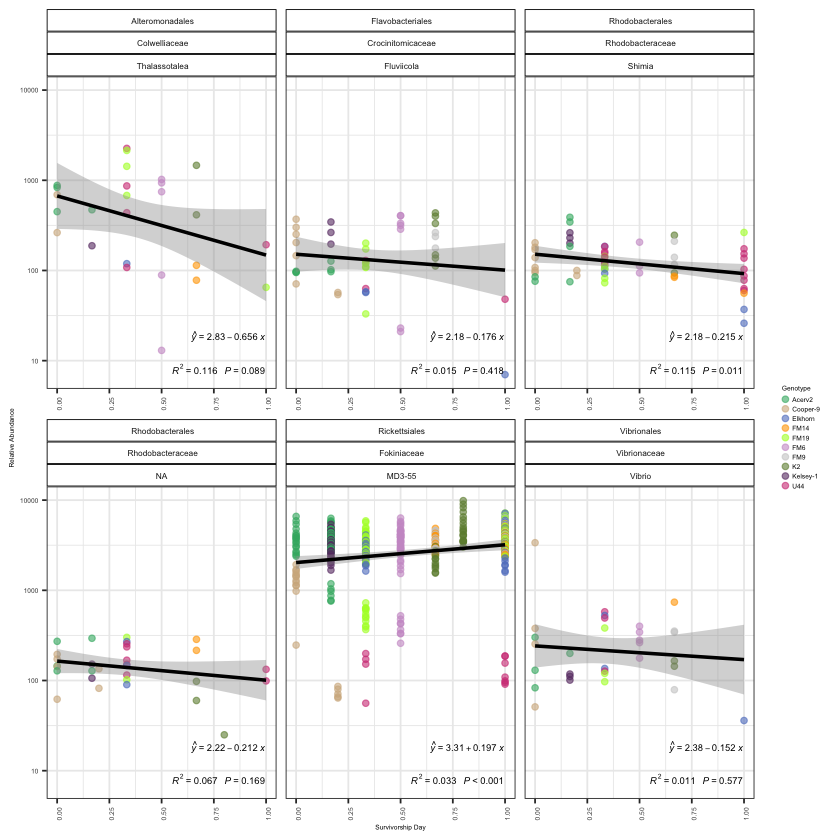

In [10]:
melt_ps_treat  %>%
filter(Abundance >0) %>%
filter(Nutrients=="NH4") %>%
#filter(Genotype!="U44") %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "g__",
                replacement = "")  %>%

mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "f__",
                replacement = "")  %>%
ggplot(
       aes(x=surv, y= Abundance, color=Genotype)) + 
geom_point(aes(color=Genotype) , alpha=.6) + 
theme_bw() +
#geom_bar(stat = "identity",position="fill") +
#geom_boxplot() +
geom_smooth(method='lm', color="black") +

 stat_poly_eq(formula = y ~ x,
                eq.with.lhs = "italic(hat(y))~`=`~",
                aes(label = paste( ..rr.label.., ..p.value.label.., sep = "~~~")), 
                parse = TRUE, label.y = "bottom", label.x = "right", color="black",
             rr.digits = 3, , size = 2) +

 stat_poly_eq(aes(label = paste(..eq.label.., sep = "~~~")), 
               label.y = 0.15,
               eq.with.lhs = "italic(hat(y))~`=`~",
               eq.x.rhs = "~italic(x)",
               formula = y ~ x, parse = TRUE, size = 2,
               label.x = "right", color="black") +

ylab("Relative Abundance") +
xlab("Survivorship Day") +

facet_wrap(.~Order*Family*Genus, scales="free_x") +
scale_color_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588"
                          )) +
#geom_point(aes(size= Abundance), alpha=0.4) +
theme_bw() +
theme(legend.title = element_text(size=5)) +
scale_y_continuous(trans = "log10") +
labs(fill='Taxon')  +
#ylab("Relative Abundance") +
#xlab("Genotype") +
theme(axis.text.x = element_text(angle = 90, hjust = 1, size=10)) +
theme(strip.background = element_rect(
     fill="white", color="black", size=.5)) +
theme(axis.text.x = element_text(angle = 90, hjust = 1, size=4)) +
theme(axis.title.x = element_text(size = 4)) +
theme(axis.title.y = element_text(size = 4)) +
#theme(axis.text.y = element_blank()) +
theme(axis.text.x = element_text(size =4)) +
theme(strip.text.y = element_text(size =4)) +
#theme(axis.text.y=element_blank()) +
theme(axis.text.y = element_text(size =4)) +
guides(color = guide_legend(keywidth = 0.2, , keyheight =.40, ncol=1)) +
#theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=4)) +
theme(strip.text.x = element_text(size = 5)) 

ggsave("/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/lm_NUT.jpg", 
      width = 4, height = 4, units = "in", dpi=300)

In [11]:
GoodTaxa = c(
"059c3e69b66695d46404b7aaeace731b",
"f7848134c8fef10bf91baeea87aa9b49",
"2180b5f4284c6a69ed3d7f81ccf42793",
"2256abda648749b2efbbc5ef6cf625d8",
"a24e19ec3a1891f7fee6cfa389fc09bd",
"2549b8aa248e7607235d17caa2578426",
"2858b9fde3b089e24129923e26bfb2e7",
"cd1c36a7f04147fce84ecdb93d5ef05c",
"fea4638d48e009fdfdec27a381a41b41",
"380e94062cd8f44ea50814193ad56225",
"0dce0a792e9123fa5535d2876b7f1fff",
"729a9b129d2e56636b4173e4d2d3cba1",
"57cae3e69e447f81b06a7ab5275a3ea8",
"c429cce2851f42f0d5a5f2b50fe18e33",
"1788860a6d5db952c73537bc4f00e6ec",
"dd854d3a4e751969b6b758713701ba6d",
"af9929b8c403fc72989769d9876fc007",
"ff3e7637bd5aac86cff3b72f9ee78f47",
"615834b295798beef85aedd0dccb7cdf",
"c4ba45067e12fe7ff43a334c839aded4",
"1f388d6a52fb1fe4e6010cd40d4cbda6",
"f4e89e31c7b0b00c0a5ad41a4ffa09da",
"2de04f6ef9c9089393685ee308a4ec93",
"9c37ff0de653f2dba99bce320e9ffe32",
"7b93a18f6d259a40bc1913d192c5ea71",
"d3671ae472095940ceb14d0af99cd4f5",
"57802246ce60e66d684511377ef5e2cc",
"6814d83c921ece2808ef7e0bd8c284a7",
"c2e0cafeeb1e69533d2bebd4f3ff5a87",
"41861cce34e32070bc99d36682bf7540",
"efd45dbce0ff782596ca0cde99a572a8",
"50434cdbb2bf05ad54615c83059a4367")

allTaxa = taxa_names(ps_paired)
allTaxa <- allTaxa[(allTaxa %in% GoodTaxa)]
sig_psr = prune_taxa(allTaxa, ps_paired)
#sig_psr =subset_samples(sig_psr, Days=="Day75")
sig_psr 

melt_ps_treat <- sig_psr %>%
psmelt() #%>% 
#drop_na(Abundance)  %>% 
#filter(Days=="Day_75")

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 32 taxa and 135 samples ]
sample_data() Sample Data:       [ 135 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 32 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 32 tips and 29 internal nodes ]

In [12]:
melt_ps_treat  %>%
#filter(Genus!=" g__MD3-55") %>%
filter(Abundance >= 0.000) %>%
filter(Phylum!=" NA") %>%
filter(Genotype!="U44") %>%
filter(Diseased=="Placebo")

OTU,Sample,Abundance,sample_names,featurecounts,Initial_sample_ID,Tag,Date_Collected,Date,TimePoint,⋯,Simpson,Shannon,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASVs
<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ff3e7637bd5aac86cff3b72f9ee78f47,N107-162,9866,N107-162,56431,107,162,5-Nov-20,5-Nov,14,⋯,0.8641231,2.106718,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,ASV_10105
c429cce2851f42f0d5a5f2b50fe18e33,N107-162,9009,N107-162,56431,107,162,5-Nov-20,5-Nov,14,⋯,0.8641231,2.106718,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,ASV_7769
1f388d6a52fb1fe4e6010cd40d4cbda6,N107-162,8249,N107-162,56431,107,162,5-Nov-20,5-Nov,14,⋯,0.8641231,2.106718,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,ASV_1233
ff3e7637bd5aac86cff3b72f9ee78f47,N211-A191,7707,N211-A191,54690,211,A191,10-Nov-20,10-Nov,19,⋯,0.8926864,2.363200,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,ASV_10105
af9929b8c403fc72989769d9876fc007,N107-162,7498,N107-162,56431,107,162,5-Nov-20,5-Nov,14,⋯,0.8641231,2.106718,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,ASV_6931
1788860a6d5db952c73537bc4f00e6ec,N107-162,7395,N107-162,56431,107,162,5-Nov-20,5-Nov,14,⋯,0.8641231,2.106718,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,ASV_951
ff3e7637bd5aac86cff3b72f9ee78f47,N108-A188,7190,N108-A188,44424,108,A188,5-Nov-20,5-Nov,14,⋯,0.8670722,2.182338,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,ASV_10105
ff3e7637bd5aac86cff3b72f9ee78f47,N172-A077,7151,N172-A077,41460,172,A077,7-Nov-20,7-Nov,16,⋯,0.8647479,2.105418,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,ASV_10105
c429cce2851f42f0d5a5f2b50fe18e33,N211-A191,7124,N211-A191,54690,211,A191,10-Nov-20,10-Nov,19,⋯,0.8926864,2.363200,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,ASV_7769


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1203 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1203 rows containing non-finite values (stat_poly_eq).”
Warning message:
“Not enough data to perform fit for group 1; computing mean instead.”
Warning message:
“Removed 1203 rows containing non-finite values (stat_poly_eq).”
Warning message:
“Not enough data to perform fit for group 1; computing mean instead.”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infini

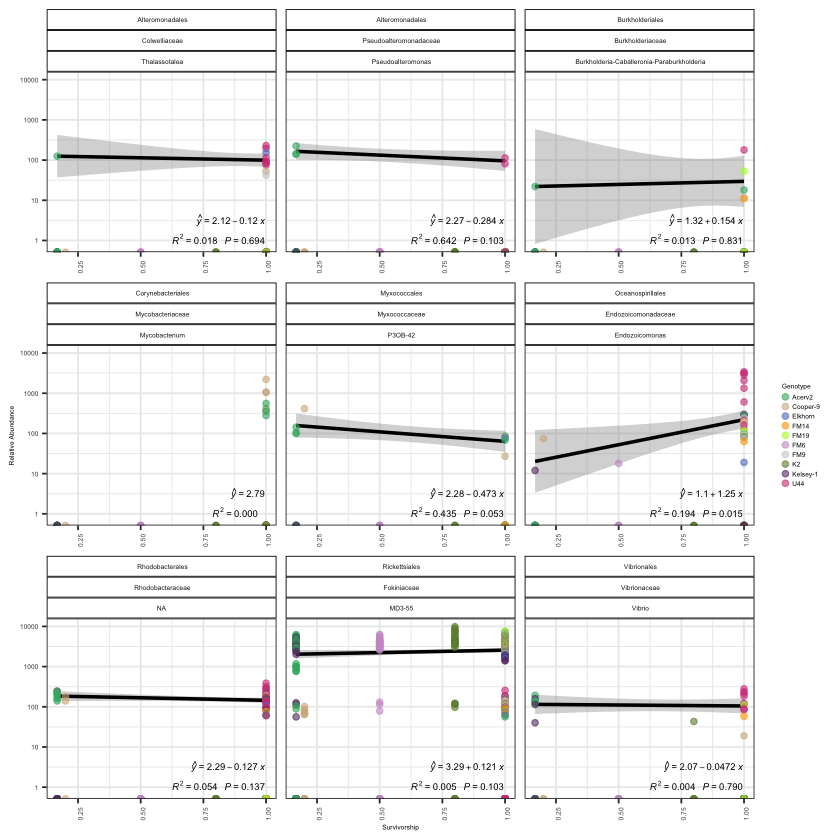

In [13]:
melt_ps_treat  %>%
filter(Phylum!=" NA") %>%
#filter(Genotype!="U44") %>%
filter(Diseased=="Placebo") %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "g__",
                replacement = "")  %>%

mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "f__",
                replacement = "")  %>%

ggplot(
       aes(x=surv, y= Abundance, color=Genotype)) + 
theme_bw() +
geom_smooth(method='lm', color="black") +

 stat_poly_eq(formula = y ~ x,
                eq.with.lhs = "italic(hat(y))~`=`~",
                aes(label = paste( ..rr.label.., ..p.value.label.., sep = "~~~")), 
                parse = TRUE, label.y = "bottom", label.x = "right", color="black",
             rr.digits = 3, , size = 2) +

 stat_poly_eq(aes(label = paste(..eq.label.., sep = "~~~")), 
               label.y = 0.15,
               eq.with.lhs = "italic(hat(y))~`=`~",
               eq.x.rhs = "~italic(x)",
               formula = y ~ x, parse = TRUE, size = 2,
               label.x = "right", color="black") +

geom_point(aes(color=Genotype) , alpha=.6) + 
ylab("Relative Abundance") +
xlab("Survivorship") +


facet_wrap(.~Order*Family*Genus, scales="free_x") +
scale_color_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588"
                          )) +
#geom_point(aes(size= Abundance), alpha=0.4) +
theme_bw() +
theme(legend.title = element_text(size=4)) +
scale_y_continuous(trans = "log10") +
labs(fill='Taxon')  +
#ylab("Relative Abundance") +
#xlab("Genotype") +
theme(axis.text.x = element_text(angle = 90, hjust = 1, size=4)) +
theme(strip.background = element_rect(
     fill="white", color="black", size=.5)) +
theme(axis.title.x = element_text(size = 4)) +
theme(axis.title.y = element_text(size = 4)) +
#theme(axis.text.y = element_blank()) +
theme(axis.text.x = element_text(size =4)) +
theme(strip.text.y = element_text(size =4)) +
#theme(axis.text.y=element_blank()) +
theme(axis.text.y = element_text(size =4)) +
guides(color = guide_legend(keywidth = 0.2, , keyheight =.40, ncol=1)) +
#theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=4)) +
theme(strip.text.x = element_text(size = 4)) 


ggsave("/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/lm_DLW.u44.jpg", 
      width = 5, height = 5, units = "in", dpi=300)

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 974 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 974 rows containing non-finite values (stat_poly_eq).”
Warning message:
“Not enough data to perform fit for group 1; computing mean instead.”
Warning message:
“Not enough data to perform fit for group 1; computing mean instead.”
Warning message:
“Removed 974 rows containing non-finite values (stat_poly_eq).”
Warning message:
“Not enough data to perform fit for group 1; computing mean instead.”
Warning message:
“Not enough data to perform fit for group 1; computing mean instead.”
Warning message:
“Transformation introduced

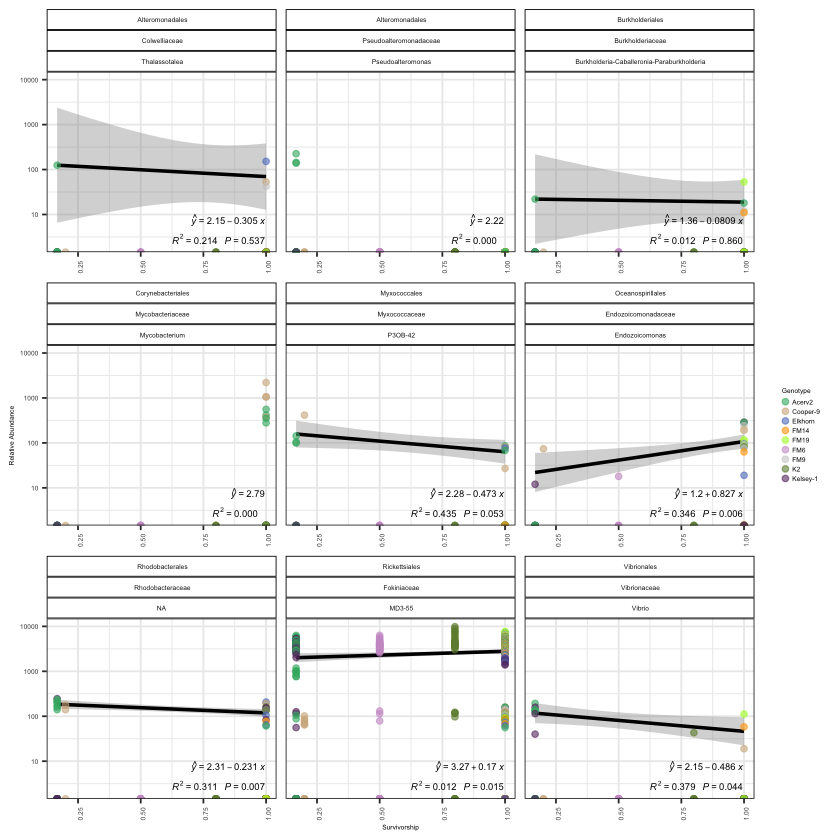

In [14]:
melt_ps_treat  %>%
filter(Phylum!=" NA") %>%
filter(Genotype!="U44") %>%
filter(Diseased=="Placebo") %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "g__",
                replacement = "")  %>%

mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "f__",
                replacement = "")  %>%

ggplot(
       aes(x=surv, y= Abundance, color=Genotype)) + 
theme_bw() +
geom_smooth(method='lm', color="black") +

 stat_poly_eq(formula = y ~ x,
                eq.with.lhs = "italic(hat(y))~`=`~",
                aes(label = paste( ..rr.label.., ..p.value.label.., sep = "~~~")), 
                parse = TRUE, label.y = "bottom", label.x = "right", color="black",
             rr.digits = 3, , size = 2) +

 stat_poly_eq(aes(label = paste(..eq.label.., sep = "~~~")), 
               label.y = 0.15,
               eq.with.lhs = "italic(hat(y))~`=`~",
               eq.x.rhs = "~italic(x)",
               formula = y ~ x, parse = TRUE, size = 2,
               label.x = "right", color="black") +

geom_point(aes(color=Genotype) , alpha=.6) + 
ylab("Relative Abundance") +
xlab("Survivorship") +


facet_wrap(.~Order*Family*Genus, scales="free_x") +
scale_color_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588"
                          )) +
#geom_point(aes(size= Abundance), alpha=0.4) +
theme_bw() +
theme(legend.title = element_text(size=4)) +
scale_y_continuous(trans = "log10") +
labs(fill='Taxon')  +
#ylab("Relative Abundance") +
#xlab("Genotype") +
theme(axis.text.x = element_text(angle = 90, hjust = 1, size=4)) +
theme(strip.background = element_rect(
     fill="white", color="black", size=.5)) +
theme(axis.title.x = element_text(size = 4)) +
theme(axis.title.y = element_text(size = 4)) +
#theme(axis.text.y = element_blank()) +
theme(axis.text.x = element_text(size =4)) +
theme(strip.text.y = element_text(size =4)) +
#theme(axis.text.y=element_blank()) +
theme(axis.text.y = element_text(size =4)) +
guides(color = guide_legend(keywidth = 0.2, , keyheight =.40, ncol=1)) +
#theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=4)) +
theme(strip.text.x = element_text(size = 4)) 


ggsave("/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/lm_DLNou44.jpg", 
      width = 5, height = 5, units = "in", dpi=300)

In [54]:
tax_table(sig_psr)

,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASVs
a24e19ec3a1891f7fee6cfa389fc09bd,d__Bacteria,NA,NA,NA,NA,NA,NA,ASV_6465
fea4638d48e009fdfdec27a381a41b41,d__Bacteria,NA,NA,NA,NA,NA,NA,ASV_10076
6814d83c921ece2808ef7e0bd8c284a7,d__Bacteria,NA,NA,NA,NA,NA,NA,ASV_4184
c4ba45067e12fe7ff43a334c839aded4,d__Bacteria,NA,NA,NA,NA,NA,NA,ASV_7799
2180b5f4284c6a69ed3d7f81ccf42793,d__Bacteria,NA,NA,NA,NA,NA,NA,ASV_1332
0dce0a792e9123fa5535d2876b7f1fff,d__Bacteria,NA,NA,NA,NA,NA,NA,ASV_559
f7848134c8fef10bf91baeea87aa9b49,d__Bacteria,NA,NA,NA,NA,NA,NA,ASV_9807
059c3e69b66695d46404b7aaeace731b,d__Bacteria,NA,NA,NA,NA,NA,NA,ASV_209
2549b8aa248e7607235d17caa2578426,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,Rhodobacterales,f__Rhodobacteraceae,NA,NA,ASV_1483
c2e0cafeeb1e69533d2bebd4f3ff5a87,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,Rhodobacterales,f__Rhodobacteraceae,NA,NA,ASV_7717
